# Принятие решений на основе данных.

Цель проекта - приоритизация гипотез, анализ результатов A/B-тест.

In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')

## Приоритизация гипотез.

In [2]:
server_path = '/datasets/hypothesis.csv'
filename = 'hypothesis.csv'
try:
    hypothesis = pd.read_csv(server_path)
except: 
    hypothesis = pd.read_csv(filename)
    
print(hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Загрузила данные о предлагаемых к проверке гипотезах и их параметрахк перевела названия столбцов в строковый формат.

В таблице приведены следующие параметры гипотез:

reach — скольких пользователей затронет изменение;

impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

confidence — уверенность, что это изменение повлияет на пользователей именно так;

efforts — сколько стоит протестировать эту гипотезу.

### Приоритизиция гипотез методом ICE.

In [4]:
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Просле применения фреймворка ICE в приоритете гипотезы 8, 0 и 7. У компании достаточно высокая уверенность, что предполагаемые изменения сильно повлияют на пользовательский опыт и удовлетворение продуктом, при этом у данных гипотез невысокая стоимость тестирования.

### Приоритизиция гипотез методом RICE.

In [5]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Просле применения фреймворка RICE в приоритете гипотезы 7, 2, 0 и 6. У гипотезы 8 очень маленький охват пользователей, поэтому по итогам данного метода у нее достаточно низкая оценка. Между тем применение гипотезы 2 охватит большое количество пользователей, поэтому не смотря на то, что ее применение не очень сильно  повлияет на пользовательский опыт, у нее достаточно высокая оценка.

### Вывод.

Оценка приоритетов гипотез после применения фреймворков ICE и RICE различается в связи с учетом во фреймоврке RICE величины охвата пользователей предполагаемыми изменениями. Логично,что добавление на все основные страницы формы подписки охватит большее количество пользователей, чем, скидка на товар в день покупки.

## Анализ A/B теста.

### Загрузка и подготовка данных к анализу.

In [6]:
server_path = '/datasets/orders.csv'
filename = 'orders.csv'
try:
    orders = pd.read_csv(server_path)
except: 
    orders = pd.read_csv(filename)
    
print(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders['date'] = pd.to_datetime(orders['date'],format='%Y/%m/%d')
display(orders.info())
print('Дубликатов:', orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

Дубликатов: 0


In [8]:
server_path = '/datasets/visitors.csv'
filename = 'visitors.csv'
try:
    visitors = pd.read_csv(server_path)
except: 
    visitors = pd.read_csv(filename)
    
print(visitors.info())
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors['date'] = pd.to_datetime(visitors['date'],format='%Y/%m/%d')
display(visitors.info())
print('Дубликатов:', visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Дубликатов: 0


Загрузила данные из файлов с результатами A/B тестирования,  перевела даты в формат даты.

В таблице orders приведена следующая информация:

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

group — группа A/B-теста (A или B);

revenue — выручка с заказа (средний чек);

date — дата заказа.

В таблице visitors приведена следующая информация:

date — дата;

group — группа A/B-теста (A или B);

visitors — количество посетителей интернет-магазина в определённой группе A/B-теста в указанную дату.

Пропусков и дубликатов в данных нет.

In [10]:
visitorA = orders[orders['group'] == 'A']['visitorId']
visitorB = orders[orders['group'] == 'B']['visitorId']
print('В группе А', len(visitorA), 'пользователей.')
print('В группе B', len(visitorB), 'пользователей.')
list_duplicate = list(set(visitorA) & set(visitorB))
print('В обеих группах есть', len(list_duplicate), 'совпадающих пользователей.')

В группе А 557 пользователей.
В группе B 640 пользователей.
В обеих группах есть 58 совпадающих пользователей.


In [11]:
orders1 = orders.query('visitorId not in @list_duplicate')
display(orders1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


None

Исключила дублирующихся пользователей из расчетов.

### Изменение кумулятивной выручки по группам.

In [12]:
dates_group = orders1[['date', 'group']].drop_duplicates()
orders_agregated = dates_group.apply(lambda x: orders1[np.logical_and(
    orders1['date'] <= x['date'], orders1['group'] == x['group'])].agg(
    {'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique',
     'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])
orders_agregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
display(orders_agregated.head())

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Посчитала агрегированные кумулятивные данные по дням и заказам.

In [13]:
cum_revenue_A = orders_agregated[orders_agregated['group'] == 'A'][['date', 'orders', 'revenue']]
cum_revenue_B = orders_agregated[orders_agregated['group'] == 'B'][['date', 'orders', 'revenue']]
display(cum_revenue_A.head())
display(cum_revenue_B.head())

,date,orders,revenue
55,2019-08-01,23,142779
175,2019-08-02,42,234381
291,2019-08-03,66,346854
499,2019-08-04,77,388030
719,2019-08-05,99,474413


,date,orders,revenue
66,2019-08-01,17,59758
173,2019-08-02,40,221801
383,2019-08-03,54,288850
498,2019-08-04,68,385740
699,2019-08-05,89,475648


Разделила данные о кумулятивной выручке по дням в разрезе групп.

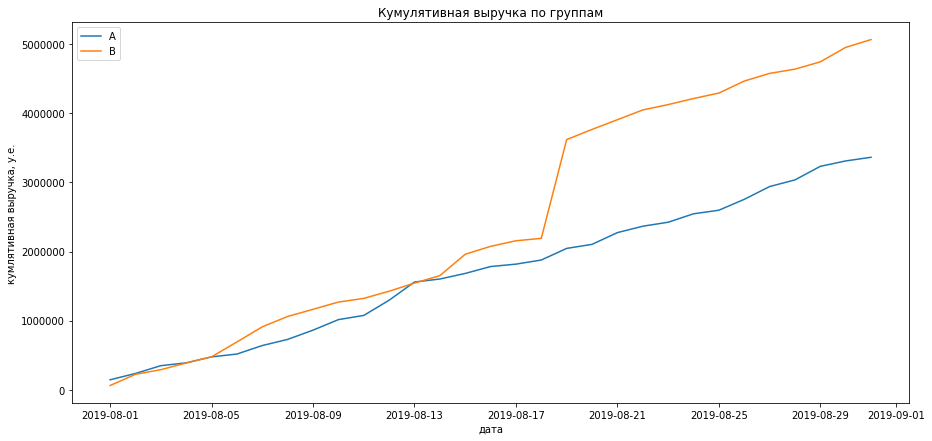

In [14]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15, 7))
plt.title('Кумулятивная выручка по группам')
plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue'], label = 'A')
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue'], label = 'B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('кумлятивная выручка, у.е.') 
plt.show()

### Вывод.
Выручка по обеим группам в течение всего времени проведения теста растет.

Первые пять дней проведения теста выручка в обеих группах примерно одинаковая, затем выручка в группе В превышает выручку в группе А. 

В группе А выручка растет равномерно, в группе В есть резкий скачок в период 18-19 августа 2019, возможно это вызвано или резким  числом заказов в эти дни, или заказами на очень большую сумму.

### Изменение кумулятивного среднего чека по группам.

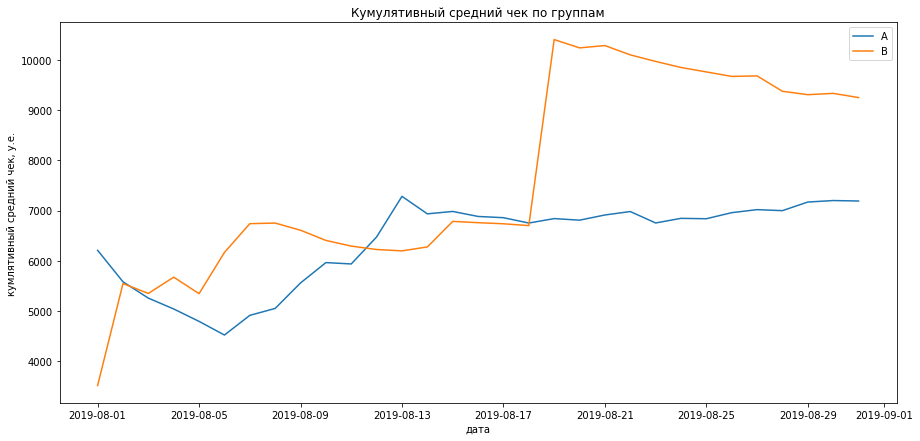

In [15]:
plt.figure(figsize=(15, 7))
plt.title('Кумулятивный средний чек по группам')
plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue']/cum_revenue_A['orders'], label = 'A')
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue']/cum_revenue_B['orders'], label = 'B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('кумлятивный средний чек, у.е.') 
plt.show()

Кумулятивный средний чек изменяется неравномерно. В группе А сначала уменьшается, затем с 6 по 14 августа идет рост (возможно в этот период были крупные покупки), затем средний чек стабилизируется на уровне 7000 у.е.

В группе В средний чек растет, затем падает, затем снова растет, начинает стабилизироваться, затем 19-20 августа происходит резкий рост чека более  чем на 3000 у.е. (аналогично резкому росту кумулятивной выручки для данной группы), затем идет плавное снижение.

### Относительное изменение кумулятивного среднего чека группы В к кумулятивному среднему чеку группы А.

In [16]:
cum_revenue = cum_revenue_A.merge(cum_revenue_B, on='date', suffixes=['A', 'B'])
display(cum_revenue.head())

,date,ordersA,revenueA,ordersB,revenueB
0,2019-08-01,23,142779,17,59758
1,2019-08-02,42,234381,40,221801
2,2019-08-03,66,346854,54,288850
3,2019-08-04,77,388030,68,385740
4,2019-08-05,99,474413,89,475648


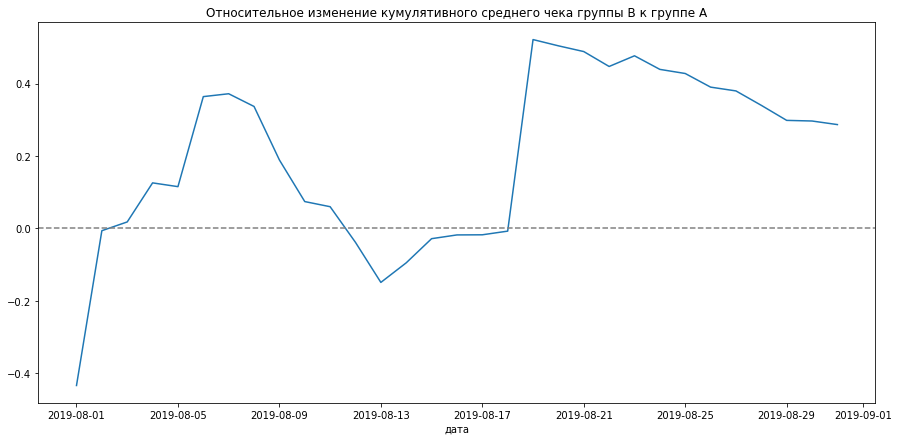

In [17]:
plt.figure(figsize=(15, 7))
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.plot(cum_revenue['date'], (cum_revenue['revenueB']/cum_revenue['ordersB']) /
         (cum_revenue['revenueA']/cum_revenue['ordersA']) - 1)
plt.axhline(y=0, color='grey', linestyle='--') 
plt.xlabel('дата')
plt.show()

### Вывод.
Не считая первого дня тестирования и провала 12-18 августа кумулятивный средний чек группы В превышает кумулятивный средний чек группы А.

Поскольку отличие очень неравномерное, "скачущее", скорее всего влияют выбросы.

### Кумулятивная конверсия по группам.

In [18]:
dates_group = orders[['date', 'group']].drop_duplicates()
visitors_agregated = dates_group.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_agregated.columns = ['date', 'group', 'visitors']
display(visitors_agregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Посчитала агрегированные кумулятивные данные по визитам и дням.

In [19]:
data_cum = orders_agregated.merge(visitors_agregated, on=['date', 'group'])
data_cum['conversion'] = data_cum['orders'] / data_cum['visitors']
display(data_cum.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


Объединила данные о заказах и визитах в одну таблицу, посчитала конверсию.

In [20]:
data_cum_A = data_cum[data_cum['group'] == 'A']
data_cum_B = data_cum[data_cum['group'] == 'B']

Выделила данные по группам.

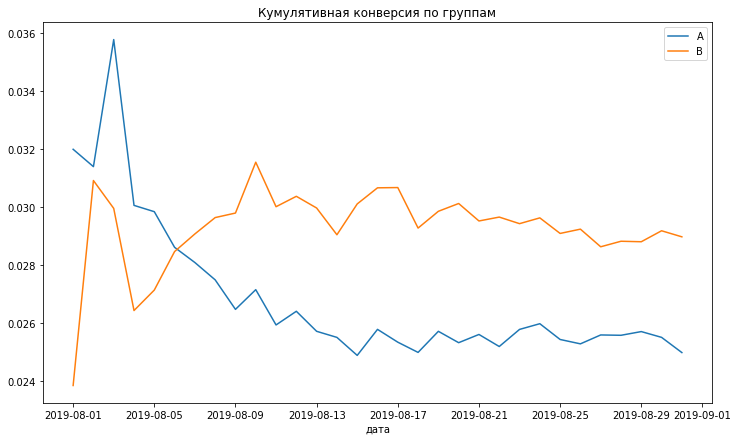

In [21]:
plt.figure(figsize=(12, 7))
plt.title('Кумулятивная конверсия по группам')
plt.plot(data_cum_A['date'], data_cum_A['conversion'], label = 'A')
plt.plot(data_cum_B['date'], data_cum_B['conversion'], label = 'B')
plt.legend()
plt.xlabel('дата')
plt.show()

Конверсия по группе А сначала превышала конверсию по группе В, но с 6 августа просела и колеблется на уровне 0.024 - 0.026. Конверсия по группе В до 18 августа неравномерно росла и падала, с 18 августа колеблется на уровне 0.028 - 0.030.

### Относительное изменение кумулятивной конверсии группы В к кумулятивной конверсии группы А.

In [22]:
cum_conversion = data_cum_A[['date', 'conversion']].merge(data_cum_B[['date', 'conversion']], on='date', suffixes=['A', 'B'])
display(cum_conversion.head())

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


Выделила кумулятивную конверсию по группам в отдельную таблицу.

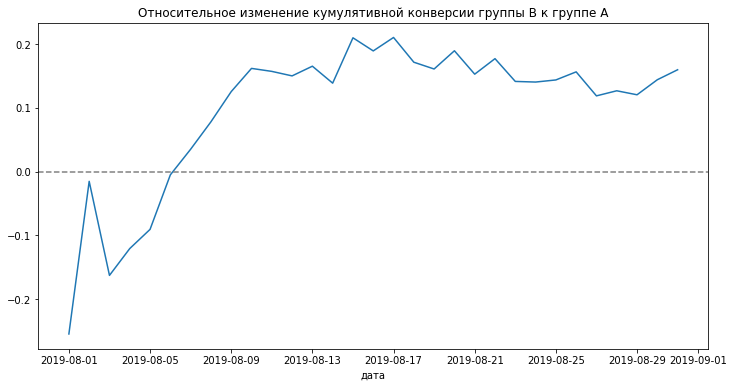

In [23]:
plt.figure(figsize=(12, 6))
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.plot(cum_conversion['date'], cum_conversion['conversionB']/cum_conversion['conversionA'] - 1)
plt.axhline(y=0, color='grey', linestyle='--') 
plt.xlabel('дата')
plt.show()

### Вывод.
Начиная с 6 августа кумулятивная конверсия группы В превышает кумулятивную конверсию группы А. С 19 августа превышение колеблется в диапазоне 0.10 - 0.20.

Возможно в период 1-19 августа  были какие-то выбросы, вызвавшие резкое колебание конверсии.

### Количество заказов по пользователям.

In [24]:
orders_by_users = (orders1.drop(['date', 'revenue', 'group'], axis=1).
                   groupby('visitorId')['transactionId'].nunique()).reset_index()
orders_by_users.columns = ['visitorId', 'orders']
display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


В отдельной таблице посчитала количество заказов на одного покупателя.

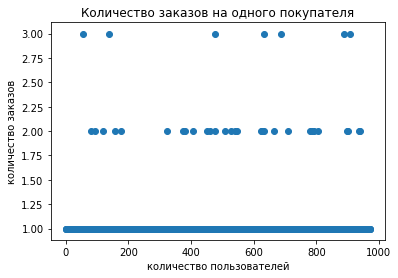

In [25]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.title('Количество заказов на одного покупателя')
plt.scatter(x_values, orders_by_users['orders'])
plt.xlabel('количество пользователей')
plt.ylabel('количество заказов')
plt.show()

Подавляющее большинство покупателей за время проведения теста делали заказ один раз, однако также много покупателей совершали 2 заказа, это не единичные случаи, для определения их доли нужно посчитать перцентили.

In [26]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


### Вывод.
5% покупателей совершили более 1 заказа за время исследования, 1% покупателей совершили более 2-х заказов.

Границей отсечения аномального числа заказов буду считать более 2-х заказов на одного пользователя (99 перцентиль). 2 покупки в месяц, это все-таки не 4, мне кажется, что их отбрасывать -  это терять не маленький объем данных.

### Стоимость заказов.

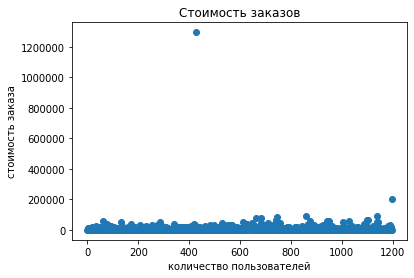

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказов')
plt.scatter(x_values, orders['revenue'])
plt.xlabel('количество пользователей')
plt.ylabel('стоимость заказа')
plt.show()

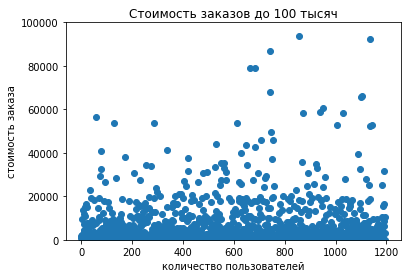

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказов до 100 тысяч')
plt.scatter(x_values, orders['revenue'])
plt.xlabel('количество пользователей')
plt.ylabel('стоимость заказа')
plt.ylim([0, 100000])
plt.show()

Большая часть заказов была совершена на сумму не превышающую 40 тысяч у.е., что хорошо видно на втором графике, однако есть заказы на сумму 200 тысяч и 1200 тысяч, это очень похоже на выбросы. 

In [29]:
print(np.percentile(orders1['revenue'], [95, 99])) 

[26785. 53904.]


### Вывод.
5% заказов дороже 26.7 тысяч у.е. и 1% заказов дороже 53.9 тысяч у.е.

Аномально дорогим заказом для целей нашего теста считаю заказы от 27 тысяч у.е. В данном случае беру 95 перцентиль, сумма 53.9 - это уже очень крупная для покупок за месяц не только для регионов, но и для крупных столичных округов, мне кажется, что если взять одинаковый перцентиль для определения аномалий в количестве покупок и в сумме заказа, то это может исказить картину.

### Различия между тестовыми группами по "сырым" данным.

#### Различия в конверсии.

In [30]:
visitors_dailyA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_dailyA.columns = ['date', 'visitors_dateA']

visitors_dailyB = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_dailyB.columns = ['date', 'visitors_dateB']
display(visitors_dailyA.head())
display(visitors_dailyB.head())

,date,visitors_dateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitors_dateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


выбрала в отдельные таблицы количество посетителей за каждую дату в разрезе групп.

In [31]:
orders_by_usersA = (orders1[orders1['group'] == 'A'].
                    groupby('visitorId')['transactionId'].nunique()).reset_index()
orders_by_usersA.columns = ['visitorId', 'orders']
orders_by_usersB = (orders1[orders1['group'] == 'B'].
                    groupby('visitorId')['transactionId'].nunique()).reset_index()
orders_by_usersB.columns = ['visitorId', 'orders']
display(orders_by_usersA.head())
display(orders_by_usersB.head())

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Посчитала количество совершенных заказов для каждого пользователя в разрезе групп.

In [32]:
sampleA = pd.concat([orders_by_usersA['orders'], pd.Series(0,
        index=np.arange(visitors_dailyA['visitors_dateA'].sum() - len(orders_by_usersA['orders'])),
        name='orders')], axis=0)
sampleB = pd.concat([orders_by_usersB['orders'], pd.Series(0,
        index=np.arange(visitors_dailyB['visitors_dateB'].sum() - len(orders_by_usersB['orders'])),
        name='orders')], axis=0)

Создала переменные, в которых пользователям из разных групп соответствует количество заказов,  тем пользователям, котрые ничего не заказали, соответствуют нули.

In [33]:
print('Статистическая значимость различий в конверсии', "{0:.3f}".format(
    stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))

print('Относительные различия конверсии', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Статистическая значимость различий в конверсии 0.011
Относительные различия конверсии 0.160


#### Вывод.
Нулевая гипотеза: нет различий в распределении конверсии между двумя группами тестирования. Альтернативная гипотеза: распределение конверсии в двух группах тестирования различается.

Статистическая значимость различий в конверсии меньше 0.05, значит отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.

Относительное превышение конверсии группы В над группой А составляет 16%.

#### Различия в среднем чеке.

In [34]:
print('Статистическая значимость различий в среднем чеке', '{0:.3f}'.format(stats.mannwhitneyu
            (orders1[orders1['group']=='A']['revenue'],
             orders1[orders1['group']=='B']['revenue'], True, 'two-sided')[1]))

print('Относительные различия в среднем чеке', '{0:.3f}'.format(orders1[orders1['group']=='B']
            ['revenue'].mean()/orders1[orders1['group']=='A']['revenue'].mean()-1))

Статистическая значимость различий в среднем чеке 0.829
Относительные различия в среднем чеке 0.287


#### Вывод.
Нулевая гипотеза: нет различий в распределении среднего чека между двумя группами тестирования. Альтернативная гипотеза: распределение среднего чека в двух группах тестирования различается.

Статистическая значимость различий в среднем чеке больше 0.05, значит нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.

При этом в средний чек группы В превышает средний чек группы А почти на 29%.

### Вывод.

Конверсия группы В превышает конверсию группы А, средний чек двух тестовых групп не имеет статистически значимого различия.

Необходимо проверить статистическую значимость различий на очищенных данных.

### Различия между тестовыми группами по "очищенным" данным.

Границей отсечения аномального числа заказов буду считать более 2-х заказов на одного пользователя.
Аномально дорогим заказом для целей нашего теста считаю заказы от 54 тысяч у.е. 

In [35]:
users_many_orders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > 2]['visitorId'],
        orders_by_usersB[orders_by_usersB['orders'] > 2]['visitorId']], axis=0)
users_expensive_orders = orders1[orders1['revenue'] >= 27000]['visitorId']
abnormal_users = pd.concat([users_many_orders, users_expensive_orders], axis=0).drop_duplicates().sort_values()
display(abnormal_users.head())
display(abnormal_users.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64

(58,)

Выбрала покупателей, сделавших более 2-х заказов и покупателей, сделавших заказы на суммы от 27 тысяч у.е., объединила в одну таблицу, удалила возможные дубликаты.

Посчитала общее количество покупателей, отклоняющихся от заданных параметров - 58.

In [36]:
sampleA_normal = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['visitorId'].isin(abnormal_users))]
                ['orders'], pd.Series(0, index=np.arange(visitors_dailyA['visitors_dateA'].sum() -
                len(orders_by_usersA['orders'])), name='orders')], axis=0)
sampleB_normal = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['visitorId'].
                isin(abnormal_users))]['orders'], pd.Series(0, index=np.arange(
                visitors_dailyB['visitors_dateB'].sum() - len(orders_by_usersB['orders'])),
                name='orders')], axis=0) 

Создала переменные на очищенных от выбросов данных, в которых пользователям из разных групп соответствует количество заказов, тем пользователям, котрые ничего не заказали, соответствуют нули.

In [37]:
print('Статистическая значимость различий в конверсии', "{0:.3f}".format(
    stats.mannwhitneyu(sampleA_normal, sampleB_normal, True, 'two-sided')[1]))

print('Относительные различия конверсии', "{0:.3f}".format(sampleB_normal.mean() / 
                                                           sampleA_normal.mean() - 1))

Статистическая значимость различий в конверсии 0.012
Относительные различия конверсии 0.182


Нулевая гипотеза: нет различий в распределении конверсии между двумя группами тестирования. Альтернативная гипотеза: распределение конверсии в двух группах тестирования различается.

Статистическая значимость различий в конверсии меньше 0.05, значит отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.

Относительное превышение конверсии группы В над группой А на очищенных данных выше, чем на сырых и составляет 18%.

In [38]:
print('Статистическая значимость различий в среднем чеке', '{0:.3f}'.format(stats.mannwhitneyu
            (orders1[np.logical_and(orders1['group']=='A',
            np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
            orders1[np.logical_and(orders1['group']=='B', np.logical_not(orders1['visitorId'].
            isin(abnormal_users)))]['revenue'], True, 'two-sided')[1]))
print('Относительные различия в среднем чеке', '{0:.3f}'.format(orders1[np.logical_and(
            orders1['group']=='B', np.logical_not(orders1['visitorId'].isin(abnormal_users)))]
            ['revenue'].mean()/orders1[np.logical_and(orders1['group']=='A', np.logical_not(
                orders1['visitorId'].isin(abnormal_users)))]['revenue'].mean()-1))

Статистическая значимость различий в среднем чеке 0.646
Относительные различия в среднем чеке -0.048


Нулевая гипотеза: нет различий в распределении среднего чека на очищенных данных между двумя группами тестирования. Альтернативная гипотеза: распределение среднего чека на очищенных данных в двух группах тестирования различается.

Статистическая значимость различий в среднем чеке больше 0.05, значит нет причин отвергать нулевую гипотезу, считаем, что в среднем чеке нет различий.

При этом в средний чек группы В после исключения выбросов ниже среднего чека группы А на 4%, что подтверждает нулевую гипотезу.

### Вывод.
Целью проекта являлась приоритизация гиоптез и проведение анализа результатов А/В тестирования гипотез.

Приоритизиция гипотез была проведена методами ICE (на основе влияний изменений на пользователей, уверенности компании во влиянии на пользователей и стоимости тестирования гипотезы) и RICE (на основании охвата пользователей, влияний изменений на пользователей, уверенности компании во влиянии на пользователей и стоимости тестирования гипотезы). По итогам применения обоих методов пятерка приоритетных гипотез совпала.

Анализ результатов А/В тестирования проведен на основании данных о совершенных пользователями покупках и количестве покупок за каждую дату.

Данные проверила на отсутствие дубликатов в каждой группе и пользователей, попавших в обе группы тестирования. Таких пользователей оказалось 58, хотя это составляет около 1% для каждой группы, исключила их из данных для чистоты проверки.

Анализировала конверсию и средний чек для обеих тестовых групп (сначала на сырых данных, затем на очищенных от выбросов). В качестве выбросов исключила большое количество покупок на одного покупателя (более 2-х) и дорогие покупки - от 27 тысяч у.е.

Первоначально проверила кумулятивные метрики.

Кумулятивная конверсия группы В превышает кумулятивную конверсию группы А, с 19 августа превышение колеблется в диапазоне 0.1 - 0.2.

График различия среднего чека для тестовых групп сильно колеблется, данные по нему неоднозначные.

Следующим шагом проверяла статистическую значимость различий в конверсии и среднем чеке между тетсовыми группами и относительное различие метрик.

Конверсия тестовых групп имеет статистически значимое различие как по сырым данным, так и после фильтрации аномалий. Показатель (p-value меньше 0.05 и составляет 0.011 для сырых и 0.012 для очищенных данны

Относительное превышение конверсии группы В над группой А на очищенных данных выше, чем на сырых и составляет 18% (на сырых данных - 16%).

По сырым и очищенным данным средний чек тестовых групп практически не имеет статистически значимых различий (p-value больше 0.05 и составляет 0.82 для сырых и 0.78 для очищенных данных).

Относительное превышение среднего чека группы А над группой В на очищенных данных составляет 4%, тогда как до удаления выбросов средний чек группы В превышал средний чек группы А на 29%. По этим данным выводов сделать нельзя.

Считаю, что по результатам роста конверсии в тестовой группе В (конверсия группы В уверенно превышает конверсию группы А) нужно остановить тест и зафиксировать победу группы В.